In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
pd.set_option('display.max_columns',  500)
print(train.shape)
print(train.dtypes.value_counts())
train.head(2)

(1460, 81)
object     43
int64      35
float64     3
dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness =  1.8828757597682129


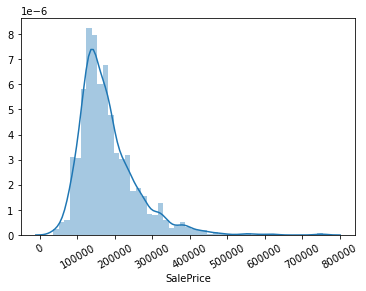

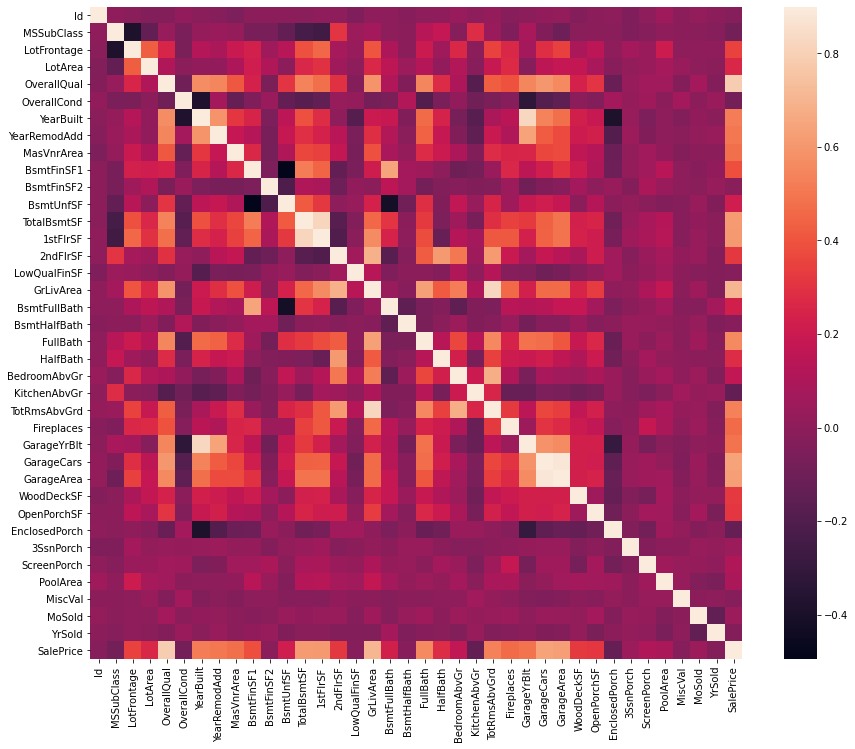

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train['SalePrice'])
plt.xticks(rotation=30);


print('Skewness = ',train['SalePrice'].skew())


# correlation
corr = train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,vmax=0.9,square=True)
plt.show();

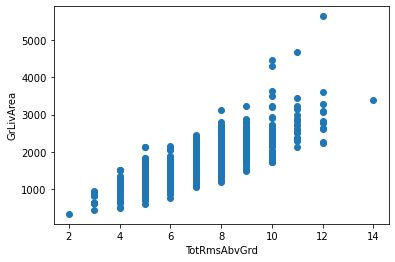

In [8]:
plt.scatter(x=train['TotRmsAbvGrd'], y=train['GrLivArea'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')
plt.show();

In [9]:
# correlation
corr = train.corr()
# sort in descending order
corr_top = corr['SalePrice'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]

corr_top

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

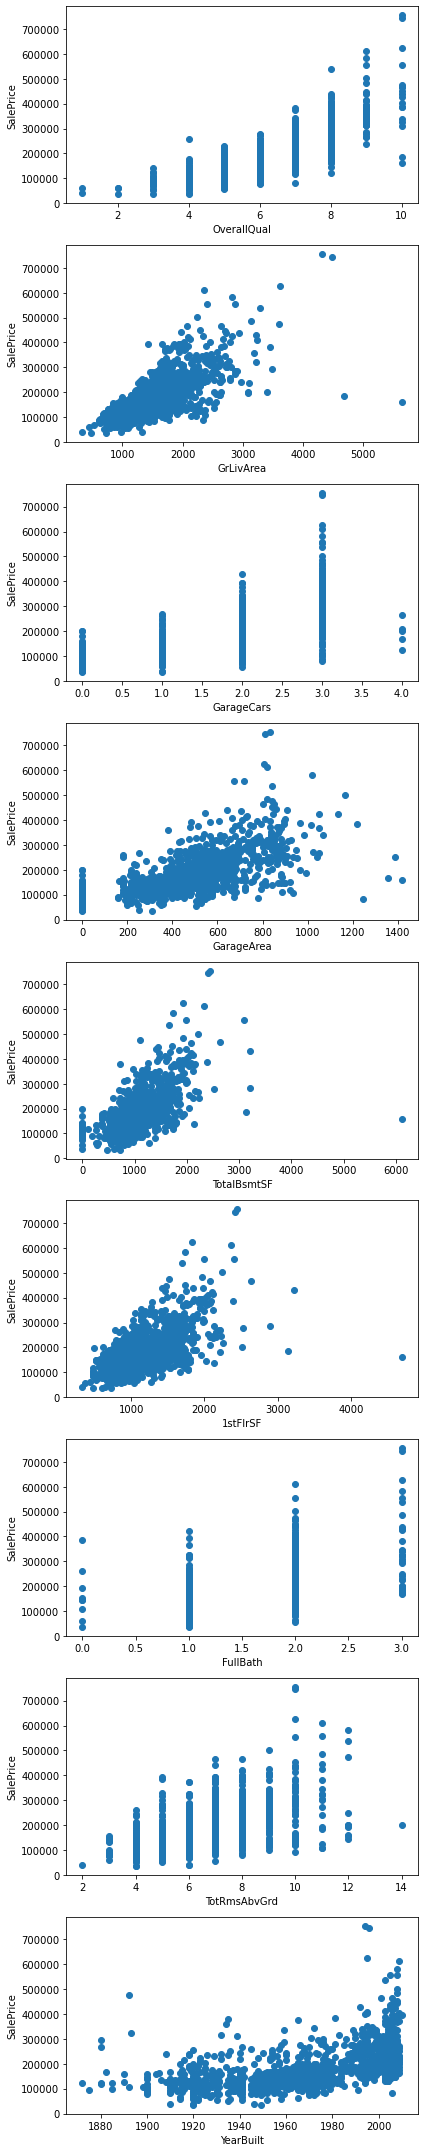

In [10]:
# Top features and SalePrice
numeric_cols = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt']
nominal_cols = ['OverallQual','GarageCars','FullBath','TotRmsAbvGrd']

fig,ax=plt.subplots(nrows=9,ncols=1,figsize=(6,30))
for i in range(len(top_features)):    

    ax[i].scatter(x=train[top_features[i]], y=train['SalePrice'])
    ax[i].set_xlabel('%s'%(top_features[i]))
    ax[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.savefig('./Top_featuresvsSalePrice.jpg',dpi=300,bbox_inches='tight')
plt.show();

In [11]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [12]:
Q1 = []
Q3 = []
Lower_bound = []
Upper_bound = []
Outliers = []


for i in top_features:
    
    # 25th and 75th percentiles
    q1, q3 = np.percentile(train[i],25), np.percentile(train[i],75)
    # Interquartile range
    iqr = q3 - q1
    # Outlier cutoff
    cut_off = 1.5*iqr
    # Lower and Upper bounds
    lower_bound = q1-cut_off
    upper_bound = q3+cut_off
        
    # save outlier indexes
    outlier = [x for x in train.index if train.loc[x,i]<lower_bound or train.loc[x,i]>upper_bound]
    
    # append values for DataFrame
    Q1.append(q1)
    Q3.append(q3)
    Lower_bound.append(lower_bound)
    Upper_bound.append(upper_bound)
    Outliers.append(len(outlier))
    
    try:
        train.drop(outlier,inplace=True,axis=0)
    except:
        continue

print(train.shape)
df_out = pd.DataFrame({'Column':top_features,'Q1':Q1,'Q3':Q3,'Lower bound':Lower_bound,'Upper_bound':Upper_bound,'No. of outliers':Outliers})    
df_out.sort_values(by='No. of outliers',ascending=False)

(1327, 81)


,Column,Q1,Q3,Lower bound,Upper_bound,No. of outliers
4,TotalBsmtSF,792.75,1266.25,82.500,1976.500,58
1,GrLivArea,1131.00,1778.25,160.125,2749.125,31
3,GarageArea,325.25,576.00,-50.875,952.125,14
7,TotRmsAbvGrd,5.00,7.00,2.000,10.000,11
5,1stFlrSF,866.00,1343.50,149.750,2059.750,7
2,GarageCars,1.00,2.00,-0.500,3.500,5
8,YearBuilt,1954.00,2000.00,1885.000,2069.000,5
0,OverallQual,5.00,7.00,2.000,10.000,2
6,FullBath,1.00,2.00,-0.500,3.500,0


In [13]:
#train rows
ntrain = train.shape[0]

#save log transform of target feature
target = np.log(train.SalePrice)

#drop Id and SalePrice from train dataframe
train.drop(['Id','SalePrice'],inplace=True,axis=1)

#store test Id
test_id = test['Id']
#drop test Id
test.drop(['Id'],inplace=True,axis=1)

#concatenate train and test dataframes
train = pd.concat([train,test])

In [14]:
print("values in PoolQC:" ,train['PoolQC'].unique())
train.isna().sum().sort_values(ascending=False).head(25)

values in PoolQC: [nan 'Fa' 'Gd' 'Ex']


PoolQC          2780
MiscFeature     2688
Alley           2595
Fence           2234
FireplaceQu     1375
LotFrontage      464
GarageCond       147
GarageQual       147
GarageYrBlt      147
GarageFinish     147
GarageType       145
BsmtCond          45
BsmtExposure      45
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        22
MasVnrArea        21
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

In [15]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2782,2786,191,2786,2786,2784,2786,2786,2786,2786,2786,2786,2786,2786,2786,2785,2785,2764,2786,2786,2786,2742,2741,2741,2744,2744,2786,2786,2786,2785,2785,2784,1411,2641,2639,2639,2639,2786,6,552,98,2785,2786
unique,5,2,2,4,4,2,5,3,25,9,7,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,5,5,2,5,4,7,5,6,3,5,5,3,3,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,2156,2776,116,1774,2508,2783,2041,2656,421,2407,2760,2316,1402,2238,2752,988,979,1669,1731,2429,1251,1253,2523,1860,824,2411,2752,1425,2611,2557,1437,2603,693,1658,1183,2491,2538,2528,3,315,91,2419,2305


In [16]:
#                                                Ordinal features
#NA means no Pool
train['PoolQC'].replace(['Ex','Gd','TA','Fa',np.nan],[4,3,2,1,0],inplace=True)

# NA means no fence
train['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw',np.nan],[4,3,2,1,0],inplace=True)

# NA means no fireplace
train['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)

#                                                 Nominal features
# NA means no feature
for i in ['MiscFeature','Alley','MasVnrType']:
    train[i].fillna('None',inplace=True)

#                                               Numerical features
# Replace null lotfrontage with average of the neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))


#                                                Ordinal features
for i in ['BsmtCond','BsmtQual']:
    train[i].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)

train['BsmtExposure'].replace(['Gd','Av','Mn','No',np.nan],[4,3,2,1,0],inplace=True)

for i in ['BsmtFinType1','BsmtFinType2']:
    train[i].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf',np.nan],[6,5,4,3,2,1,0],inplace=True)     

#                                               Numerical features
for i in ['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    train[i].fillna(0,inplace=True)
    

#If no masonary work, then area is 0
train['MasVnrArea'].fillna(0,inplace=True)

#Replace with the most common value
for i in ['MSZoning','Utilities']:
    train[i].fillna(train[i].mode()[0],inplace=True)

#"Assume typical unless deductions are warranted"
train['Functional'].fillna('Typ',inplace=True)

#Replace with others
train['SaleType'].fillna('Oth',inplace=True)
#Replace with most common value
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)

#Replace with 'Other' value
for i in ['Exterior1st','Exterior2nd']:
    train[i].fillna('Other',inplace=True)
    
#Replace with most common value
train['KitchenQual'].fillna(train['KitchenQual'].mode()[0],inplace=True)
#ordinal value
train['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace=True)


In [17]:
#                                                Ordinal features
train['CentralAir'].replace(['N','Y'],[0,1],inplace=True)
#                                                 Nominal features
for i in ['HeatingQC','ExterCond','ExterQual']:
    train[i].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace=True)

In [18]:
# Total surface area of house
train['TotalSF'] = train.apply(lambda x: x['1stFlrSF'] + x['2ndFlrSF'] + x['TotalBsmtSF'], axis=1)

# Total number of bathrooms in the house
train['TotalBath'] = train.apply(lambda x: x['FullBath'] + 0.5*x['HalfBath'] + x['BsmtFullBath'] + 0.5*x['BsmtHalfBath'], axis=1)

# Total Porch area in the house
train['TotalPorch'] = train.apply(lambda x: x['OpenPorchSF'] + x['EnclosedPorch'] + x['3SsnPorch'] + x['ScreenPorch'], axis=1)

# New house or an old house
train['NewHouse'] = train.apply(lambda x: 1 if x['SaleCondition']=='Partial' else 0, axis=1)


In [19]:
# One-Hot encoding
train = pd.get_dummies(train,drop_first=True)
train.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF,TotalBath,TotalPorch,NewHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,3,2,4,3,1,6,706.0,1,0.0,150.0,856.0,4,1,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,0,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,0,0,2,2008,2566.0,3.5,61,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,2,2,4,3,4,5,978.0,1,0.0,284.0,1262.0,4,1,1262,0,0,1262,0.0,1.0,2,0,3

In [20]:
# train dataset
df = train.iloc[:ntrain,:]

# test dataset
test = train.iloc[ntrain:,:]

In [21]:
from sklearn.model_selection import train_test_split

X = df
y = target

# training and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [22]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(X_train)
Xtest_imputed = my_imputer.fit_transform(X_test)
#ytrain_imputed = my_imputer.fit_transform(y_train)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(data_with_imputed_values,y_train)

rmse = np.sqrt(mean_squared_error(y_test,lr.predict(Xtest_imputed)))
print(rmse)

0.11046608530070536


In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# different alpha values
alphas = [0.01, 0.1, 0.3, 1, 3, 5, 10, 15, 20]

for a in alphas:

    lr = Ridge(alpha=a)
    
    lr.fit(data_with_imputed_values,y_train)
    
    rmse = np.sqrt(mean_squared_error(y_test,lr.predict(Xtest_imputed)))
    print('For Alpha = ',a,', RMSE = ',rmse)

For Alpha =  0.01 , RMSE =  0.11027396212576678
For Alpha =  0.1 , RMSE =  0.10947778877295676
For Alpha =  0.3 , RMSE =  0.10924540544269991
For Alpha =  1 , RMSE =  0.10977469326818318
For Alpha =  3 , RMSE =  0.10983853031088675
For Alpha =  5 , RMSE =  0.10928941741147385
For Alpha =  10 , RMSE =  0.10808506105778541
For Alpha =  15 , RMSE =  0.10735770639348456
For Alpha =  20 , RMSE =  0.10694153710819199


In [25]:
model = Ridge(alpha=20)
model.fit(data_with_imputed_values,y_train)


Ridge(alpha=20)

In [26]:
test.shape

(1459, 218)

In [31]:
test.dropna(axis=0, how='all')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF,TotalBath,TotalPorch,NewHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,2,2,3,3,1,3,468.0,2,144.0,270.0,882.0,2,1,896,0,0,896,0.0,0.0,1,0,2,1,2,5,0,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,3,0,6,2010,1778.0,1.0,120,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,2,2,3,3,1,5,923.0,1,0.0,406.0,1329.0,2,1,1329,0,0,1329,0.0,0.0,

In [35]:
test.isna().sum().sort_values(ascending=False).head(10)

GarageYrBlt              78
GarageCars                1
GarageArea                1
SaleCondition_Partial     0
MSZoning_RL               0
Neighborhood_Crawfor      0
Neighborhood_CollgCr      0
Neighborhood_ClearCr      0
Neighborhood_BrkSide      0
Neighborhood_BrDale       0
dtype: int64

In [37]:
feats = test.select_dtypes(
        include=[np.number]).interpolate()

In [40]:
feats.shape

(1459, 218)

In [44]:
log_pred = model.predict(feats)
actual_pred = np.exp(log_pred)


In [45]:
print ("Original predictions are: \n", log_pred[:5], "\n")
print ("Final predictions are: \n", actual_pred[:5])

Original predictions are: 
 [11.65350182 12.29693204 12.0909695  12.20568924 12.15265885] 

Final predictions are: 
 [115093.69596125 219023.00215823 178254.84199595 199923.3344477
 189597.53163573]


In [47]:
data_dict = {'Id':test_id,'SalePrice':actual_pred}
submit = pd.DataFrame(data_dict)
#submit.head(2)
submit.to_csv('submission.csv',index=False)